<a href="https://colab.research.google.com/github/soham7707/Portfolio_Agents/blob/main/Volatility_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 14.3 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

In [5]:
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

In [6]:
model = arch_model(returns, vol='ARCH', p=1)
arch_result = model.fit(disp='off')
print(arch_result.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1397.44
Distribution:                  Normal   AIC:                           2800.87
Method:            Maximum Likelihood   BIC:                           2815.59
                                        No. Observations:                 1000
Date:                Sat, May 03 2025   Df Residuals:                      999
Time:                        08:03:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0193  3.088e-02      0.626      0.531 

In [7]:
model = arch_model(returns, vol='GARCH', p=1, q=1)
garch_result = model.fit(disp='off')
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1397.23
Distribution:                  Normal   AIC:                           2802.47
Method:            Maximum Likelihood   BIC:                           2822.10
                                        No. Observations:                 1000
Date:                Sat, May 03 2025   Df Residuals:                      999
Time:                        08:03:49   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0182  3.099e-02      0.589      0.556 

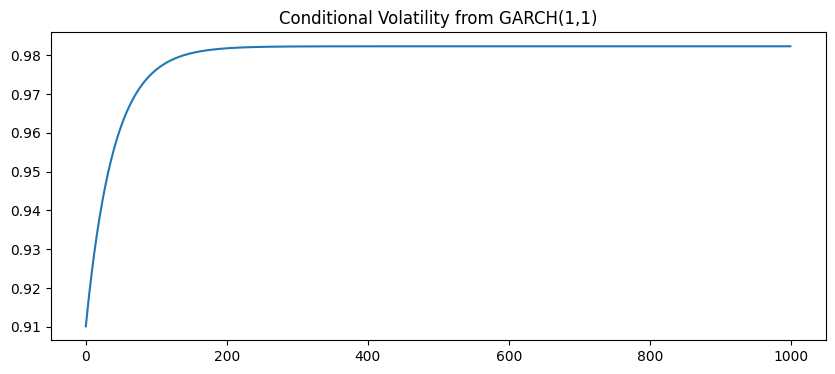

In [8]:
plt.figure(figsize=(10,4))
plt.plot(garch_result.conditional_volatility)
plt.title("Conditional Volatility from GARCH(1,1)")
plt.show()

In [9]:
forecast = garch_result.forecast(horizon=5)
print(forecast.variance[-1:])

          h.1       h.2       h.3       h.4       h.5
999  0.964965  0.964965  0.964965  0.964965  0.964965


In [10]:
np.random.seed(13)
# a0 and a1 are constant and should be greater than 0
a0 = 2
a1 = .5
# Random number generator with size 1000:
y = w = np.random.normal(size=1000)
Y = np.empty_like(y)
for t in range(len(y)):
 Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))   #Formula of ARCH(1)
# simulated ARCH(1) series, looks like white noise
tsplot(Y, lags=30)

NameError: name 'tsplot' is not defined

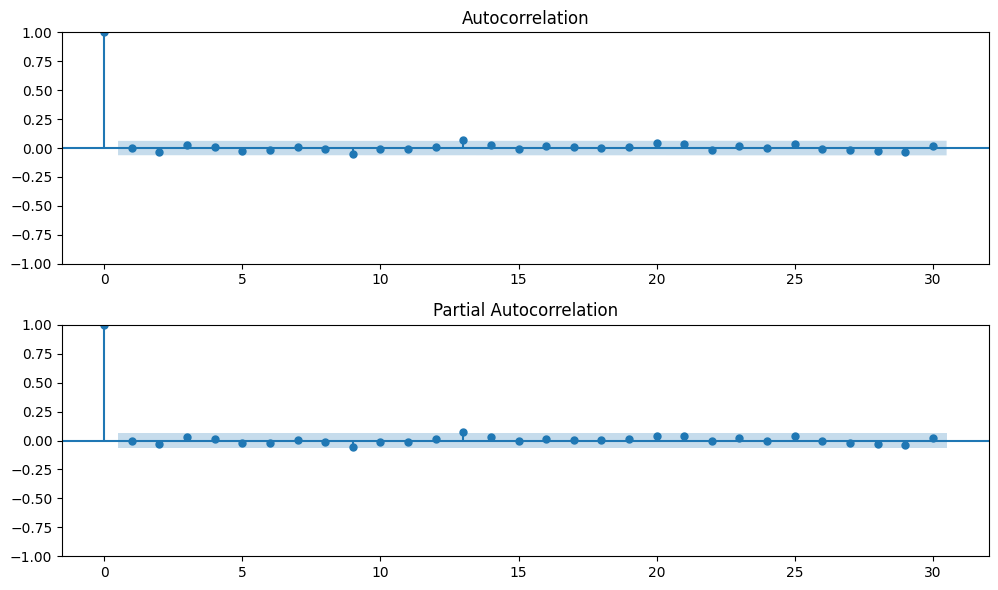

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Autocorrelation and Partial Autocorrelation
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(Y, lags=30, ax=axes[0])
plot_pacf(Y, lags=30, ax=axes[1])
plt.tight_layout()
plt.show()


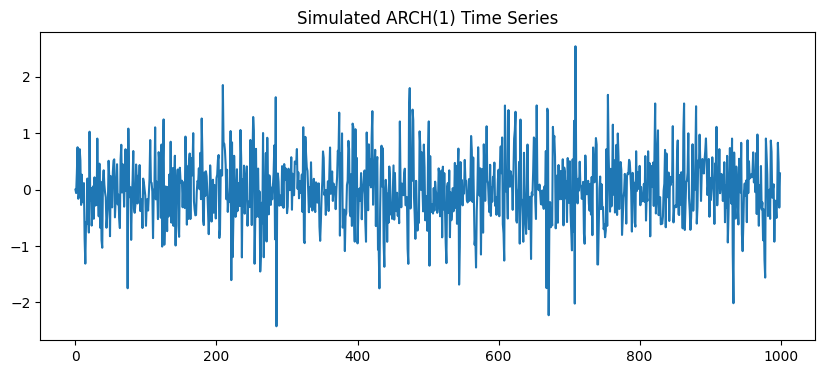

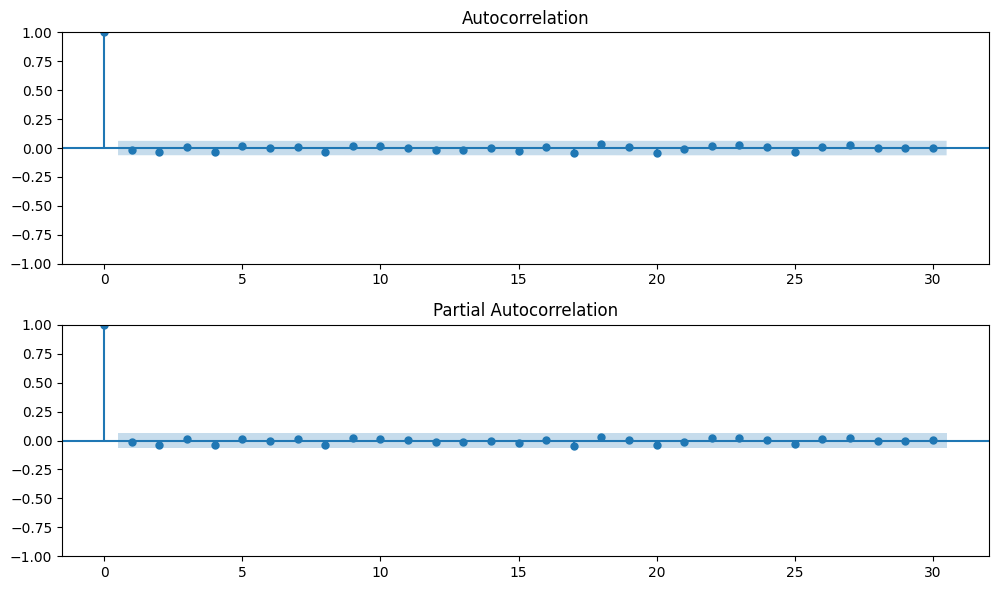

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(42)
n = 1000
a0 = 0.2
a1 = 0.5

w = np.random.normal(0, 1, size=n)
y = np.zeros(n)
Y = np.zeros(n)

for t in range(1, n):
    y[t] = np.sqrt(a0 + a1 * Y[t-1] ** 2)
    Y[t] = w[t] * y[t]

# Plot time series
plt.figure(figsize=(10, 4))
plt.plot(Y)
plt.title("Simulated ARCH(1) Time Series")
plt.show()

# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(Y, lags=30, ax=axes[0])
plot_pacf(Y, lags=30, ax=axes[1])
plt.tight_layout()
plt.show()


In [14]:
 pip install tsplot

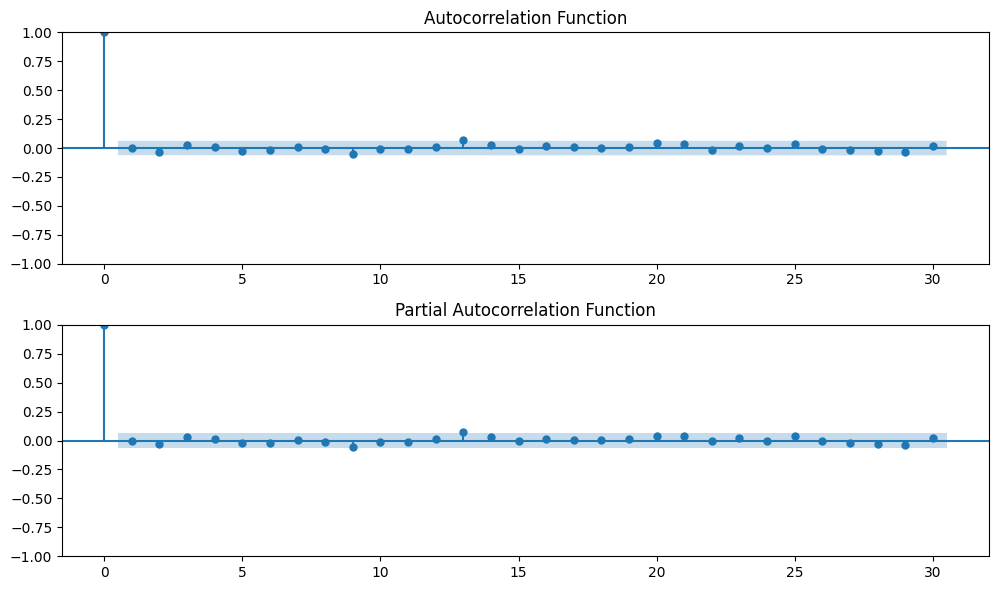

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(13)
# a0 and a1 are constant and should be greater than 0
a0 = 2
a1 = 0.5
# Random number generator with size 1000:
y = w = np.random.normal(size=1000)
Y = np.empty_like(y)
for t in range(len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1 * y[t - 1] ** 2))  # Formula of ARCH(1)

# Instead of tsplot, use plot_acf and plot_pacf from statsmodels
# to visualize the autocorrelation and partial autocorrelation functions
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(Y, lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function')
plot_pacf(Y, lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

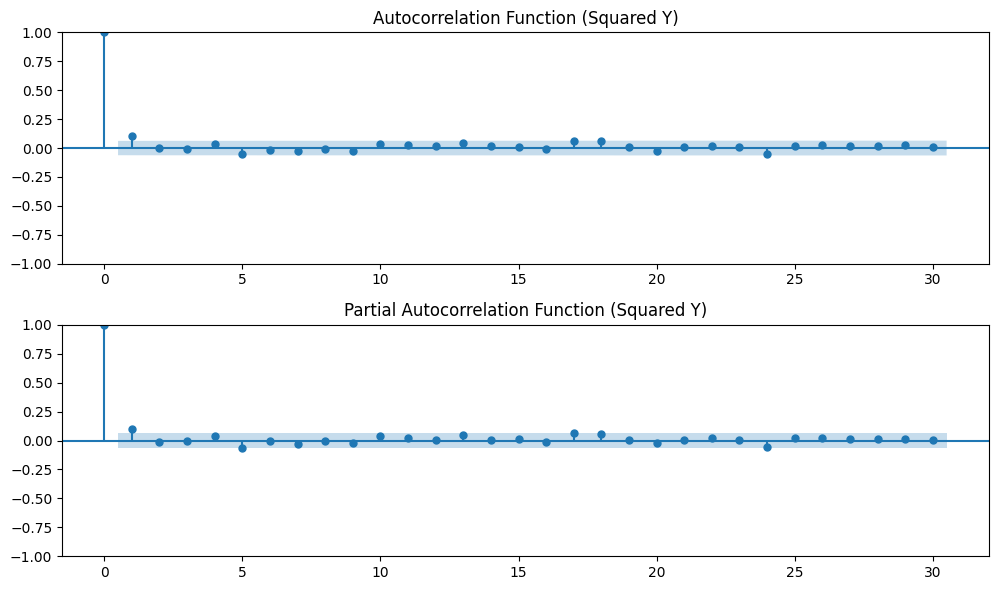

In [18]:
!pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(13)
# a0 and a1 are constant and should be greater than 0
a0 = 2
a1 = 0.5
# Random number generator with size 1000:
y = w = np.random.normal(size=1000)
Y = np.empty_like(y)
for t in range(len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1 * y[t - 1] ** 2))  # Formula of ARCH(1)

# Instead of tsplot, use plot_acf and plot_pacf from statsmodels
# to visualize the autocorrelation and partial autocorrelation functions of the squared series
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(np.square(Y), lags=30, ax=axes[0]) # Plot ACF of squared Y
axes[0].set_title('Autocorrelation Function (Squared Y)')
plot_pacf(np.square(Y), lags=30, ax=axes[1]) # Plot PACF of squared Y
axes[1].set_title('Partial Autocorrelation Function (Squared Y)')
plt.tight_layout()
plt.show()

In [20]:
# Fit a GARCH(1, 1) model to our simulated EPS series
# We use the arch_model function from the ARCH package
from arch import arch_model
# Assuming 'Y' from previous cells contains the simulated time series data:
am = arch_model(Y) # Replace 'eps' with 'Y' or the actual variable name
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1843.1034700070823
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1843.1017510398492
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1843.10
Distribution:                  Normal   AIC:                           3694.20
Method:            Maximum Likelihood   BIC:                           3713.83
                                        No. Observations:                 1000
Date:                Sat, May 03 2025   Df Residuals:                      999
Time:                        08:18:31   Df Model:                            1
        

In [30]:
def _get_best_model(TS):
    best_aic = np.inf
    best_order = None
    best_mdl = None
    pq_rng = range(5)
    d_rng = range(2)
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i, d, j), trend='n').fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except:
                    continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return best_aic, best_order, best_mdl


In [29]:
def _get_best_model(TS):
    best_aic = np.inf
    best_order = None
    best_mdl = None
    pq_rng = range(5)
    d_rng = range(2)

    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i, d, j), trend='n').fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except:
                    continue

    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return best_aic, best_order, best_mdl


In [3]:
!pip install matplotlib

In [8]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.4 MB/s eta 0:00:00


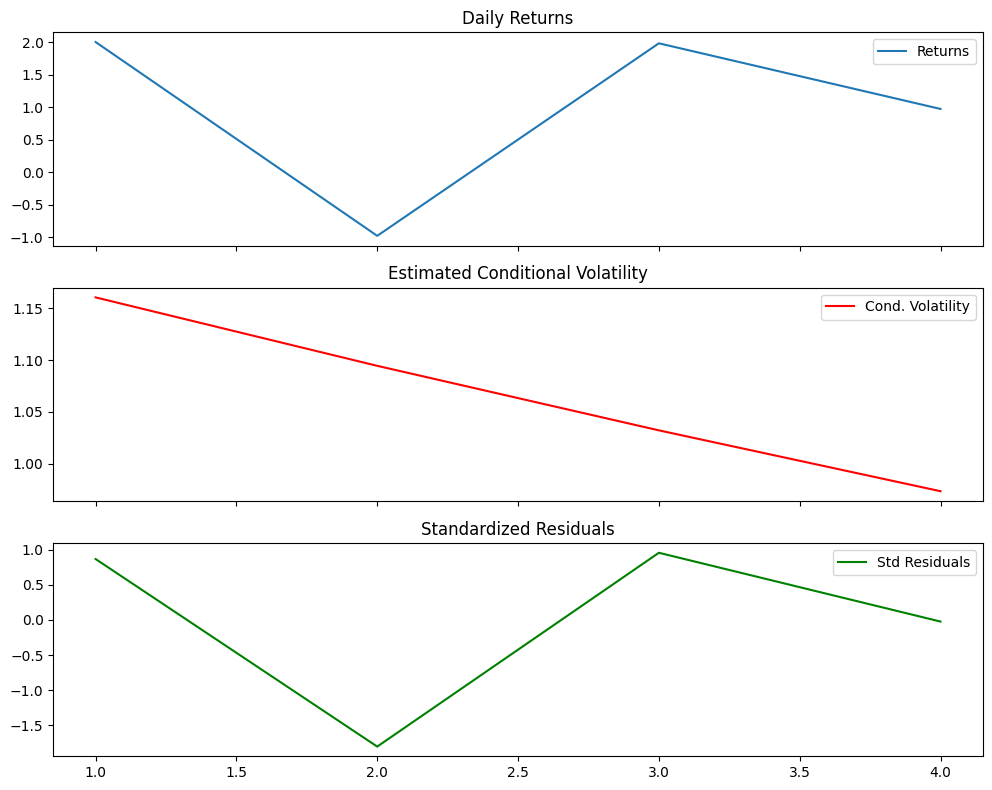

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from arch import arch_model

# Sample data
data = pd.DataFrame({'Adj Close': [100, 102, 101, 103, 104]})

# Calculate percentage returns
returns = 100 * data['Adj Close'].pct_change().dropna()

# Fit GARCH(1,1) model
model = arch_model(returns, vol='GARCH', p=1, q=1)
model_fit = model.fit(disp='off')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: Raw returns
axs[0].plot(returns, label='Returns')
axs[0].set_title('Daily Returns')
axs[0].legend()

# Plot 2: Conditional Volatility
axs[1].plot(model_fit.conditional_volatility, color='red', label='Cond. Volatility')
axs[1].set_title('Estimated Conditional Volatility')
axs[1].legend()

# Plot 3: Standardized Residuals
standardized_residuals = model_fit.resid / model_fit.conditional_volatility
axs[2].plot(standardized_residuals, color='green', label='Std Residuals')
axs[2].set_title('Standardized Residuals')
axs[2].legend()

plt.tight_layout()
plt.show()
